In [1]:
%matplotlib inline

import os
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
import string
import re

from konlpy.tag import Okt
# from konlpy.tag import Mecab 

#pip install kss
from kss import split_sentences   
#from pykospacing import spacing

from gensim.models import Word2Vec

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Embedding, Dense,GRU,Flatten, LSTM,Conv1D, GlobalMaxPooling1D, Embedding, Dropout, GlobalAveragePooling1D

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

from kerastuner.tuners import RandomSearch # 랜덤서치를 합니다

from gensim .models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc
from tqdm import tqdm

C:\Users\USER2\AppData\Local\Temp\ipykernel_3600\3342763137.py:31: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch # 랜덤서치를 합니다


### Ward clustering 군집 덴드로그램 

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import silhouette_score

In [6]:
# 실루엣 계수 뽑는 함수
# data = 워드 임베딩된 데이터
# num_cluster = 뽑고 싶은 클러스터 개수
def visualize_silhouette_layer1(data, num_cluster):
    clusters_range = range(2,int(num_cluster))
    results = []

    for i in clusters_range:
        clusterer = AgglomerativeClustering(n_clusters=i,linkage='ward')
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_ac = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    return result, pivot_ac

In [16]:
df = df[["token", "review vector"]]
df = df.dropna()
df

,token,review vector
0,"[차량, 기준, 짐, 양, 또는, 무게, 기준, 동일, 차량, 동일, 박스, 갯수,...","[-0.24247675, -0.3832933, -0.65480703, 0.53034..."
1,"[가끔, 집, 초파리, 씽, 크다, 쪽, 초파리, 잡늠, 트랩, 보다, 이사, 원룸...","[-0.2212786, -0.36489442, -0.53280455, 0.03410..."
2,"[수돗물, 끊다, 보리차, 말다, 부산, 낙동강, 물이, 식수, 녹조, 관련, 기사...","[-0.47978452, -0.5407626, -0.48259103, 0.20468..."
3,"[전, 먼지, 항상, 집, 돌아오다, 청소기, 먼저, 켜다, 코, 먼지, 바닥, 뭔...","[-0.16076118, -0.5236053, -0.6171309, 0.112681..."
4,"[오피스텔, 살다, 관리, 실, 전화, 옆집, 너무, 해달라다, 말좀, 전, 정도,...","[-0.34533203, -0.44942692, -0.31203076, 0.3374..."
...,...,...
27713,"[달, 간장게장, 밀, 키트, 자취, 생, 메뉴, 추천, 루비, 복사, 이웃, 추가...","[-0.3765098, -0.3454816, -0.5698355, 0.2057069..."
27714,"[제주, 여행, 이야기, 제주도, 여행, 즐기다, 방법, 제주, 여행, 혼족, 여행...","[-0.34583157, 0.14726967, -0.34356228, 0.55983..."
27715,"[사용, 세척, 가성, 비, 크다, 세제, 에코, 후, 레쉬, 스파클링, 세탁, 세...","[-0.49821508, -0.5254435, -0.77649206, 0.11396..."
27716,"[상품, 소개, 휴대, 용, 신발, 건조기, 살균, 건조, 신화, 기프트, 복사, ...","[-0.36073, -0.34368798, -0.72656566, 0.1559081..."


In [18]:
df["review vector"] = np.array(df["review vector"],dtype=object)
print(df["review vector"])

0        [-0.24247675, -0.3832933, -0.65480703, 0.53034...
1        [-0.2212786, -0.36489442, -0.53280455, 0.03410...
2        [-0.47978452, -0.5407626, -0.48259103, 0.20468...
3        [-0.16076118, -0.5236053, -0.6171309, 0.112681...
4        [-0.34533203, -0.44942692, -0.31203076, 0.3374...
                               ...                        
27713    [-0.3765098, -0.3454816, -0.5698355, 0.2057069...
27714    [-0.34583157, 0.14726967, -0.34356228, 0.55983...
27715    [-0.49821508, -0.5254435, -0.77649206, 0.11396...
27716    [-0.36073, -0.34368798, -0.72656566, 0.1559081...
27717    [-0.31549126, -0.32641113, -0.28825375, 0.1549...
Name: review vector, Length: 27718, dtype: object


In [26]:
rv = []
ul = []
for a, i in enumerate(df["review vector"]):
    if type(i) != int:
        rv.append(i)
    else:
        ul.append(a)
print(len(rv))
print(len(ul))
ul

27693
25


[3742,
 4017,
 4813,
 4952,
 4968,
 4971,
 4974,
 4988,
 5013,
 5014,
 5015,
 5016,
 5017,
 5317,
 5326,
 5327,
 5328,
 5916,
 17823,
 18210,
 22670,
 25486,
 26755,
 27349,
 27529]

In [28]:
for i in ul:
    df = df.drop(df.index[i])
df = df.reset_index(drop = True)
df

,token,review vector
0,"[차량, 기준, 짐, 양, 또는, 무게, 기준, 동일, 차량, 동일, 박스, 갯수,...","[-0.24247675, -0.3832933, -0.65480703, 0.53034..."
1,"[가끔, 집, 초파리, 씽, 크다, 쪽, 초파리, 잡늠, 트랩, 보다, 이사, 원룸...","[-0.2212786, -0.36489442, -0.53280455, 0.03410..."
2,"[수돗물, 끊다, 보리차, 말다, 부산, 낙동강, 물이, 식수, 녹조, 관련, 기사...","[-0.47978452, -0.5407626, -0.48259103, 0.20468..."
3,"[전, 먼지, 항상, 집, 돌아오다, 청소기, 먼저, 켜다, 코, 먼지, 바닥, 뭔...","[-0.16076118, -0.5236053, -0.6171309, 0.112681..."
4,"[오피스텔, 살다, 관리, 실, 전화, 옆집, 너무, 해달라다, 말좀, 전, 정도,...","[-0.34533203, -0.44942692, -0.31203076, 0.3374..."
...,...,...
27688,"[달, 간장게장, 밀, 키트, 자취, 생, 메뉴, 추천, 루비, 복사, 이웃, 추가...","[-0.3765098, -0.3454816, -0.5698355, 0.2057069..."
27689,"[제주, 여행, 이야기, 제주도, 여행, 즐기다, 방법, 제주, 여행, 혼족, 여행...","[-0.34583157, 0.14726967, -0.34356228, 0.55983..."
27690,"[사용, 세척, 가성, 비, 크다, 세제, 에코, 후, 레쉬, 스파클링, 세탁, 세...","[-0.49821508, -0.5254435, -0.77649206, 0.11396..."
27691,"[상품, 소개, 휴대, 용, 신발, 건조기, 살균, 건조, 신화, 기프트, 복사, ...","[-0.36073, -0.34368798, -0.72656566, 0.1559081..."


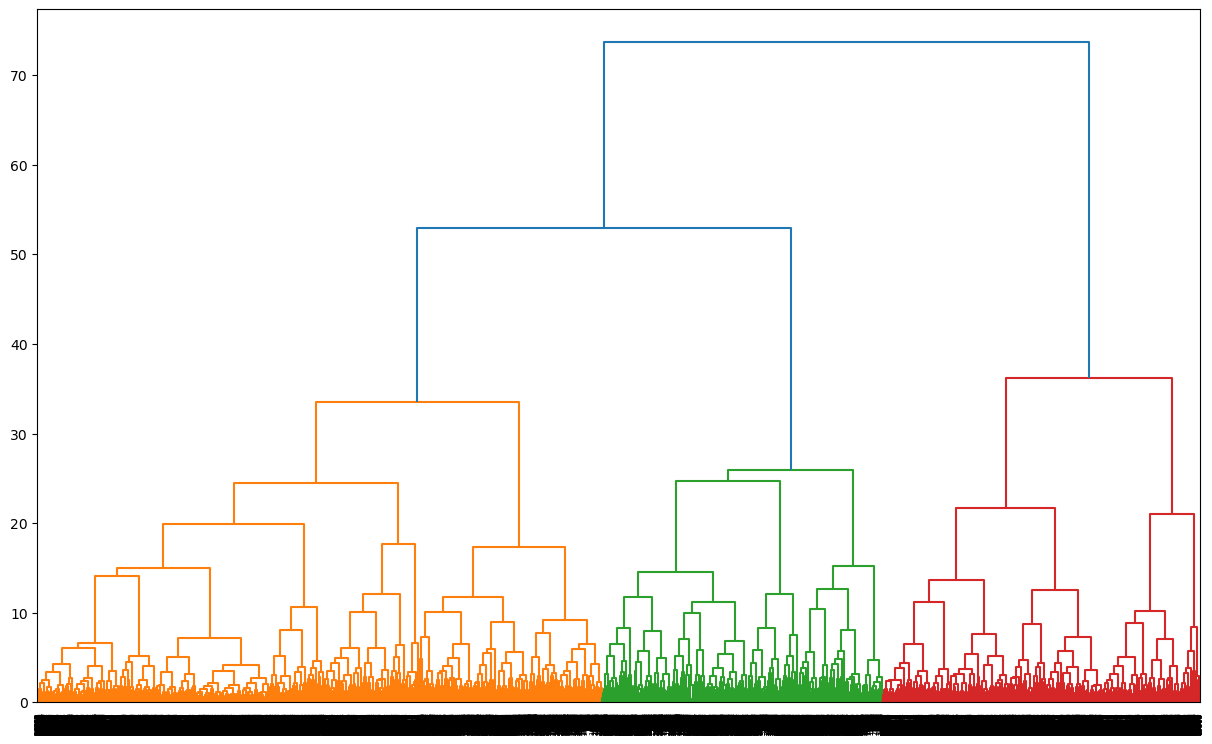

In [21]:
linked = linkage(rv, 'ward')

plt.figure(figsize=(15, 9))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

### 실루엣 계수 조정

In [32]:
for i in tqdm(range(6,9)):
    model = AgglomerativeClustering(n_clusters=i,linkage='ward')
    label = model.fit_predict(rv)
    df["cluster {0}".format(i)] = label

100%|██████████| 3/3 [01:17<00:00, 25.87s/it]
